In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

# Importing File

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Pipeline Project\Raw File\Global_Superstore_Raw_file.csv",encoding = 'latin1')

### Initial Inspection

In [3]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
21181,22657,ID-2014-45055,31-10-2014,02-11-2014,First Class,ME-17725,Max Engle,Consumer,Lahore,Punjab,Pakistan,NaN,APAC,Central Asia,OFF-PA-10003418,Office Supplies,Paper,"Enermax Memo Slips, Multicolor",42.675,5,0.5,-13.725,11.26,Medium
14916,5444,US-2014-128181,22-03-2014,26-03-2014,Standard Class,EH-13945,Eric Hoffmann,Consumer,Piedras Negras,Coahuila,Mexico,NaN,LATAM,North,FUR-BO-10004407,Furniture,Bookcases,"Ikea Floating Shelf Set, Metal",181.120,2,0.2,-11.320,19.89,High


In [71]:
df = df.replace(["Unknown","unknown","NA","Null","NULL"],np.nan)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [73]:
df["Row ID"].duplicated().sum()

np.int64(0)

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.shape

(51290, 24)

### Standardizing Columns

In [76]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [77]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [78]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [79]:
for col in df.columns:
    print(col,df[col].dtype ,sep = " ---> ")

row_id ---> int64
order_id ---> object
order_date ---> object
ship_date ---> object
ship_mode ---> object
customer_id ---> object
customer_name ---> object
segment ---> object
city ---> object
state ---> object
country ---> object
postal_code ---> float64
market ---> object
region ---> object
product_id ---> object
category ---> object
sub-category ---> object
product_name ---> object
sales ---> float64
quantity ---> int64
discount ---> float64
profit ---> float64
shipping_cost ---> float64
order_priority ---> object


In [80]:
df1 = df.copy()

### Converting Date Column Into Dates

In [81]:
df["order_date"].dtype

dtype('O')

In [82]:
df["order_date"] = pd.to_datetime(df["order_date"],dayfirst = True , errors = "raise")

In [83]:
df["order_date"].dtype

dtype('<M8[ns]')

In [84]:
df["ship_date"].dtype

dtype('O')

In [85]:
df["ship_date"] = pd.to_datetime(df["ship_date"], dayfirst = True , errors = "raise")

In [86]:
df["ship_date"].dtype

dtype('<M8[ns]')

### Inspecting Categorical Columns

In [87]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [88]:
df["segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [89]:
df["city"]

0        New York City
1           Wollongong
2             Brisbane
3               Berlin
4                Dakar
             ...      
51285             Kure
51286          Houston
51287           Oxnard
51288         Valinhos
51289         Tipitapa
Name: city, Length: 51290, dtype: object

In [90]:
df["state"]

0               New York
1        New South Wales
2             Queensland
3                 Berlin
4                  Dakar
              ...       
51285          Hiroshima
51286              Texas
51287         California
51288          São Paulo
51289            Managua
Name: state, Length: 51290, dtype: object

In [91]:
df["country"]

0        United States
1            Australia
2            Australia
3              Germany
4              Senegal
             ...      
51285            Japan
51286    United States
51287    United States
51288           Brazil
51289        Nicaragua
Name: country, Length: 51290, dtype: object

In [92]:
df["postal_code"]

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: postal_code, Length: 51290, dtype: float64

In [93]:
df[df["postal_code"].isna()].sample(4)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
48214,8128,MX-2011-159856,2011-12-09,2011-12-13,Standard Class,RP-19270,Rachel Payne,Corporate,Spanish Town,Saint Catherine,...,OFF-BI-10000188,Office Supplies,Binders,"Cardinal Hole Reinforcements, Economy",7.12,2,0.0,0.20,0.70,Medium
15160,29024,ID-2013-25868,2013-05-22,2013-05-24,First Class,BG-11035,Barry Gonzalez,Consumer,Anqing,Anhui,...,FUR-CH-10003354,Furniture,Chairs,"Novimex Bag Chairs, Black",174.12,4,0.0,1.68,19.43,Critical
17132,41874,EG-2012-3510,2012-08-21,2012-08-26,Standard Class,BM-1785,Bryan Mills,Consumer,Abu Kabir,Ash Sharqiyah,...,TEC-BEL-10002476,Technology,Accessories,"Belkin Router, Bluetooth",258.75,1,0.0,10.35,16.15,Medium
2712,30286,IN-2014-30880,2014-10-09,2014-10-11,Second Class,LT-16765,Larry Tron,Consumer,Dhaka,Dhaka,...,TEC-MA-10001261,Technology,Machines,"Konica Printer, Wireless",535.68,2,0.0,246.36,107.01,High


In [94]:
df["postal_code"].isna().sum()*100/df.shape[0]

np.float64(80.51472021836615)

In [95]:
df1 = df.copy()
df = df.drop(labels= ["postal_code"],axis = 1)

In [96]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [97]:
df["market"]

0            US
1          APAC
2          APAC
3            EU
4        Africa
          ...  
51285      APAC
51286        US
51287        US
51288     LATAM
51289     LATAM
Name: market, Length: 51290, dtype: object

In [98]:
df["region"]

0              East
1           Oceania
2           Oceania
3           Central
4            Africa
            ...    
51285    North Asia
51286       Central
51287          West
51288         South
51289       Central
Name: region, Length: 51290, dtype: object

In [99]:
df["product_id"]

0         TEC-AC-10003033
1         FUR-CH-10003950
2         TEC-PH-10004664
3         TEC-PH-10004583
4        TEC-SHA-10000501
               ...       
51285     OFF-FA-10000746
51286     OFF-AP-10002906
51287     OFF-EN-10001219
51288     OFF-BI-10000806
51289     OFF-PA-10004155
Name: product_id, Length: 51290, dtype: object

In [100]:
df["category"].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [101]:
df = df.rename(columns= {"sub-category":"sub_category"})

In [102]:
df["sub_category"].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [103]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [104]:
df["product_name"]

0        Plantronics CS510 - Over-the-Head monaural Wir...
1                Novimex Executive Leather Armchair, Black
2                        Nokia Smart Phone, with Caller ID
3                           Motorola Smart Phone, Cordless
4                           Sharp Wireless Fax, High-Speed
                               ...                        
51285                        Advantus Thumb Tacks, 12 Pack
51286    Hoover Replacement Belt for Commercial Guardsm...
51287         #10- 4 1/8" x 9 1/2" Security-Tint Envelopes
51288                              Acco Index Tab, Economy
51289              Eaton Computer Printout Paper, 8.5 x 11
Name: product_name, Length: 51290, dtype: object

In [105]:
df["order_priority"].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

### Quantitative Data Preperation

In [107]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [108]:
numeric_cols = ["sales","quantity","discount","profit","shipping_cost"]

for col in numeric_cols:
    print(col, df[col].dtype)

sales float64
quantity int64
discount float64
profit float64
shipping_cost float64


In [109]:
df[["quantity","discount","profit","shipping_cost","sales"]].sample(10)

,quantity,discount,profit,shipping_cost,sales
48164,9,0.17,3.9690,0.70,42.5790
13641,2,0.27,-2.3142,22.47,82.8258
30358,1,0.00,9.7200,5.34,24.3600
30815,3,0.00,15.7500,5.14,71.7300
28725,1,0.00,12.0900,6.10,109.9500
26122,6,0.20,16.7508,7.52,49.6320
4797,2,0.00,93.7200,68.91,520.6800
24138,3,0.10,17.0100,8.79,109.3500
9567,5,0.00,176.3860,34.60,629.9500
43377,4,0.40,-11.4240,1.54,17.1360


In [110]:
df[df["quantity"]<=0]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority


In [111]:
df.loc[df["discount"]>1,"discount"] = df.loc[df["discount"]>1,"discount"]/100

### Creating Gross Sales & COGS Columns

In [112]:
df["gross_sales"] = df["sales"]/(1-df["discount"])

In [113]:
df.loc[:4,["gross_sales","discount","sales"]]

,gross_sales,discount,sales
0,2309.65,0.0,2309.650
1,4121.55,0.1,3709.395
2,5750.19,0.1,5175.171
3,3213.90,0.1,2892.510
4,2832.96,0.0,2832.960


In [114]:
df["cogs"] = df["sales"]-df["profit"]
df["unit_price"] = df["gross_sales"]/df["quantity"]

In [115]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,gross_sales,cogs,unit_price
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,2309.65,1547.4655,329.95


#### Final Check

In [116]:
for col in df.columns:
    print(col, df[col].dtype, df[col].isna().sum(), sep = " | ")

row_id | int64 | 0
order_id | object | 0
order_date | datetime64[ns] | 0
ship_date | datetime64[ns] | 0
ship_mode | object | 0
customer_id | object | 0
customer_name | object | 0
segment | object | 0
city | object | 0
state | object | 0
country | object | 0
market | object | 0
region | object | 0
product_id | object | 0
category | object | 0
sub_category | object | 0
product_name | object | 0
sales | float64 | 0
quantity | int64 | 0
discount | float64 | 0
profit | float64 | 0
shipping_cost | float64 | 0
order_priority | object | 0
gross_sales | float64 | 0
cogs | float64 | 0
unit_price | float64 | 0


In [117]:
df = df.rename(columns= {"row_id" : "transaction_id"})

## Data Modeling: Implementing the Star Schema

In [118]:
df.columns

Index(['transaction_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority', 'gross_sales', 'cogs', 'unit_price'],
      dtype='object')

In [ ]:
products = ["product_id","product_name","category","sub_category"]
customers =  ["customer_id","customer_name","segment"]
location = ["city","state","country","market","region"]
logistics = ["order_priority","ship_mode"]


df_products = df[products].drop_duplicates(subset=["product_id"])
df_customers = df[customers].drop_duplicates(subset=["customer_id"])
df_location = df[location].drop_duplicates()
df_logistics = df[logistics].drop_duplicates()

#### Creating Unique Key

In [120]:
df_location["location_id"] = df_location.index+1
df_location.insert(0,"location_id",df_location.pop("location_id"))

df_location.head(3)

,location_id,city,state,country,market,region
0,1,New York City,New York,United States,US,East
1,2,Wollongong,New South Wales,Australia,APAC,Oceania
2,3,Brisbane,Queensland,Australia,APAC,Oceania


In [121]:
df_logistics["log_id"] = df_logistics.index+1
df_logistics.insert(0,"log_id",df_logistics.pop("log_id"))

df_logistics.head(3)

,log_id,order_priority,ship_mode
0,1,Critical,Same Day
1,2,Critical,Second Class
2,3,Medium,First Class


## Fact Table Creation: Integrating Foreign Keys

In [145]:
location = ["city","state","country","market","region"]
logistics = ["order_priority","ship_mode"]
products = ["product_name","category","sub_category"]
customers =  ["customer_name","segment"]

df = (
    df.merge(df_location, on = location , how = "inner")
      .merge(df_logistics, on = logistics, how = "inner")
      .drop(labels = products + customers+ location + logistics , axis = 1)
)

In [146]:
df.columns

Index(['transaction_id', 'order_id', 'order_date', 'ship_date', 'customer_id',
       'product_id', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'gross_sales', 'cogs', 'unit_price', 'location_id',
       'log_id'],
      dtype='object')

In [154]:
df.sample(2)

,transaction_id,order_id,order_date,ship_date,customer_id,product_id,sales,quantity,discount,profit,shipping_cost,gross_sales,cogs,unit_price,location_id,log_id
28400,19363,ES-2014-2022735,2014-10-13,2014-10-16,GK-14620,TEC-AC-10002883,84.30,2,0.0,27.78,6.26,84.30,56.52,42.15,2481,43
10798,19737,ES-2014-2199059,2014-05-08,2014-05-12,GG-14650,OFF-SU-10000514,187.08,4,0.0,80.40,30.07,187.08,106.68,46.77,6441,8


In [153]:
df_customers.sample(2)

,customer_id,customer_name,segment
31,BS-11365,Bill Shonely,Corporate
20981,MP-7965,Michael Paige,Corporate


In [152]:
df_location.sample(2)

,location_id,city,state,country,market,region
10128,10129,Pekalongan,Jawa Tengah,Indonesia,APAC,Southeast Asia
22604,22605,Torbat-e Heydariyeh,Razavi Khorasan,Iran,EMEA,EMEA


In [151]:
df_products.sample(2)

,product_id,product_name,category,sub_category
25318,OFF-LA-10004832,"Novimex Legal Exhibit Labels, Alphabetical",Office Supplies,Labels
43250,OFF-HON-10004800,"Hon Shipping Labels, Alphabetical",Office Supplies,Labels


In [155]:
df_logistics.sample(2)

,log_id,order_priority,ship_mode
6,7,Critical,First Class
8,9,Low,Standard Class


## Preliminary Data Analysis: Validation and Key Insights

#### 1. Profit By Segment

In [190]:
profit_report = pd.merge(df_customers, df, on = "customer_id", how = "left").groupby("segment")["profit"].sum().reset_index(name = "total_profit")
profit_report

,segment,total_profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


Text(0.5, 1.0, 'Profit By Customer Segment')

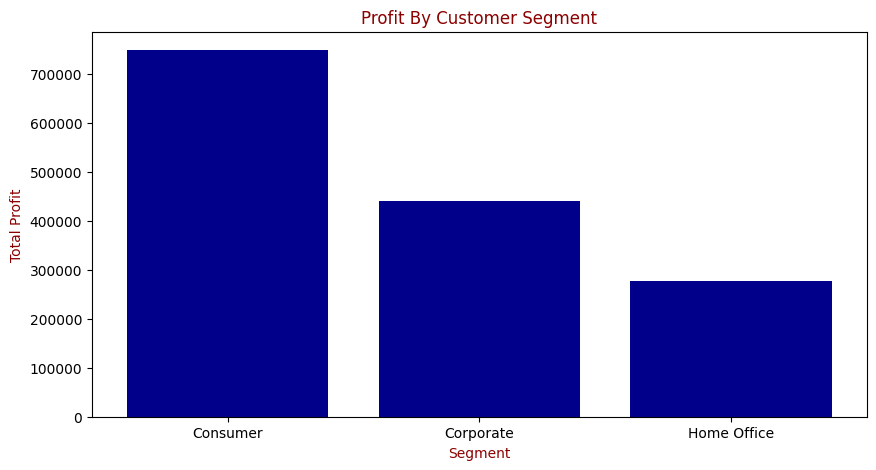

In [191]:
plt.figure(figsize = (10,5))
plt.bar(profit_report["segment"], profit_report["total_profit"], color = "darkblue")

plt.xlabel("Segment",color = "darkred")
plt.ylabel("Total Profit",color = "darkred")
plt.title("Profit By Customer Segment", color = "darkred")

### 2. Top Countries By Sales

In [213]:
top_5_countries = (df.merge(df_location, on = "location_id", how = "inner").groupby("country")["sales"].sum().reset_index(name = "total sales")
).sort_values(by = "total sales", ascending = False).iloc[:5]
top_5_countries["total sales"] = top_5_countries["total sales"].astype(int)
top_5_countries

,country,total sales
139,United States,2297200
6,Australia,925235
44,France,858931
26,China,700562
47,Germany,628840


Text(0.5, 1.0, 'Top Countries By Sales (USD)')

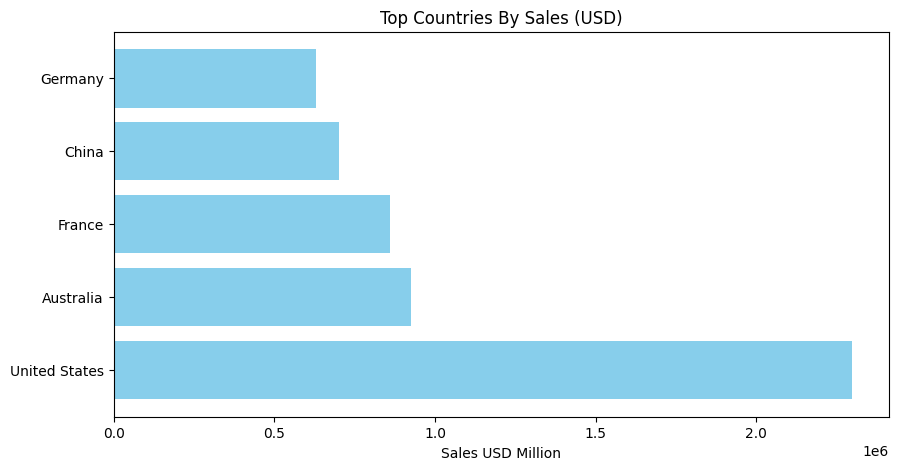

In [215]:
plt.figure(figsize=(10,5))
plt.barh(top_5_countries["country"], top_5_countries["total sales"], color = "skyblue")
plt.xlabel("Sales USD Million")
plt.title("Top Countries By Sales (USD)")

In [ ]:
df = df.drop(columns = ["order_month","order_monthname"])
df_fact = df.copy()

## Connecting With MySQL DataBase

In [ ]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "####"
password = "####"
password = quote_plus(password)
db_name = "pipeline"
host = "localhost"
port = 3306

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{db_name}")

conn = engine.connect()

df_products.to_sql(name = "products", if_exists= "append", con = engine, index = False)
df_customers.to_sql(name = "customers", if_exists= "append", con = engine, index= False)
df_location.to_sql(name = "locations", if_exists= "append", con = engine, index = False)
df_logistics.to_sql(name = "logistics", if_exists= "append", con = engine, index = False)
df_fact.to_sql(name = "fact", if_exists= "append", con = engine, index = False)


51290